In [1]:
using Distributions, CopEnt, Plots

In [12]:
mis_true = []
mis_copent = []
ρs = 0.1:0.05:0.9
for ρ in ρs
    push!(mis_true, -1 / 2 * log(1 - ρ^2))
    x = rand(MvNormal(zeros(2), [1 ρ; ρ 1]), 1_000)
    push!(mis_copent, copula_entropy(x; dist=Chebyshev()))
end

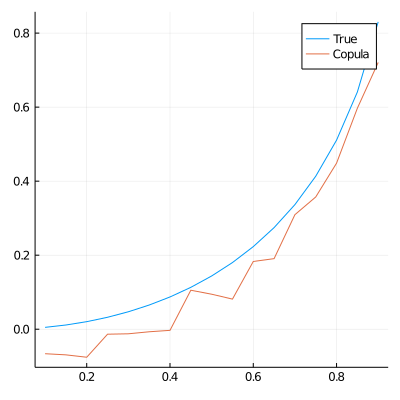

In [13]:
p = plot(size=(400, 400))
plot!(p, ρs, mis_true,   label="True")
plot!(p, ρs, mis_copent, label="Copula")

In [10]:
μ = zeros(2)
ρ = 0.5
Σ = [1 ρ; ρ 1]
x = rand(MvNormal(μ, Σ), 1_000)
mi = -copula_entropy(x)

0.09628373468819706

In [11]:
-1 / 2 * log(1 - ρ^2)

0.14384103622589045